<a href="https://colab.research.google.com/github/nbPittigiani/teste/blob/main/Estudo_dirigido_Heart_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estudos dirigido

### Heart Disease

### Dataset: Problemas Cardíocos

1. age - Idade
2. sex - Sexo (0- feminino, 1- masculino)
3. chest pain type (4 values) - Tipo de dor no peito (value1: typical angina, value2: atypical angina, value3: non-anginal pain, value4: asymptomatic)
4. resting blood pressure - Pressão arterial em repouso
5. serum cholestoral in mg/dl - Colesterol sérico em mg/dl
6. fasting blood sugar > 120 mg/dl - Açúcar no sangue em jejum > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2) - Resultados eletrocardiográficos em repouso (valores 0,1,2)
8. maximum heart rate achieved - Frequência cardíaca máxima alcançada
9. exercise induced angina - Angina induzida por exercício
10. oldpeak = ST depression induced by exercise relative to rest - Pico antigo = depressão do segmento ST induzida pelo exercício em relação ao repouso
11. the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy thal: 0 = normal; 1 = fixed defect; 2 = reversable defect -  Inclinação do pico do exercício Número do segmento ST dos vasos principais (0-3) colorido pela fluorosopia tal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível

target. Heart disease (0 = Não, 1 = Sim)

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

https://towardsdatascience.com/2-types-of-duplicate-features-in-machine-learning-2931de6c949b

https://deepchecks.com/what-is-data-cleaning/

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [257]:
dados = pd.read_csv('heart.csv')
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [258]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [259]:
dados.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [260]:
dados.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


In [261]:
dados.duplicated().sum()

723

In [262]:
dados = dados.drop_duplicates()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [263]:
dados.duplicated().sum()

0

In [264]:
dados.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

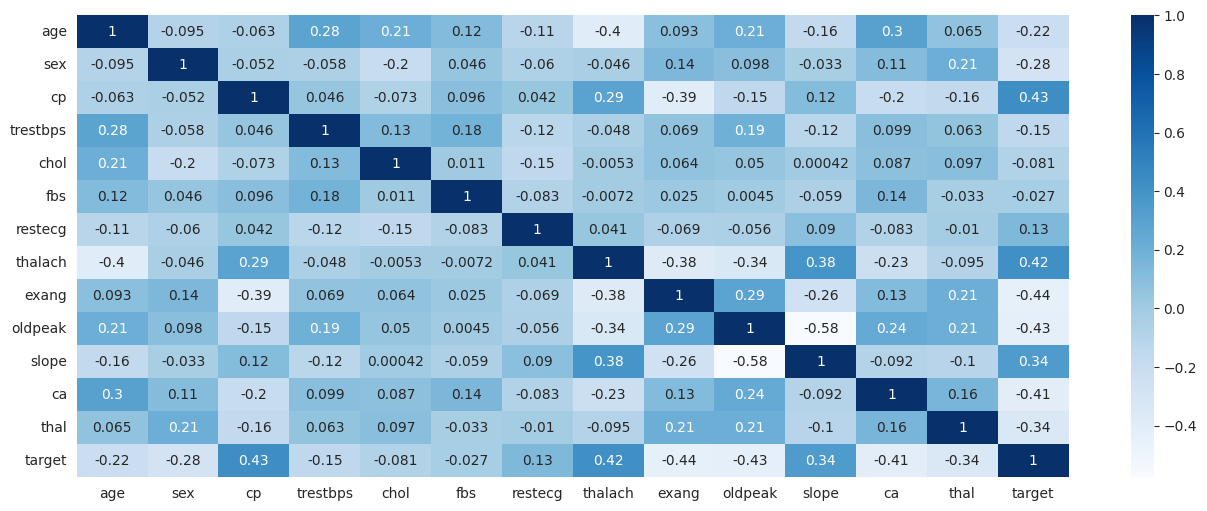

In [265]:
plt.figure(figsize=(16,6))
sns.heatmap(dados.corr(), annot=True, cmap='Blues')

In [266]:
for c in dados.columns:
  print(f"{c}: {(dados[c].nunique())}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


Com auxilio da análise do código anterior, fiz o seguinte Loop para guardar o nome das colunas categoricas e nominais do nosso DataFrame

In [267]:
categoricas = []
nominal = []

for c in dados.columns:

  if dados[c].nunique() > 5:
    nominal.append(c)
  else:
    categoricas.append(c)

In [268]:
categoricas

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [269]:
# Excluir o valor 'target' para seguir os mesmos passos do vídeo.
categoricas.remove('target')

In [270]:
categoricas

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [271]:
nominal

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

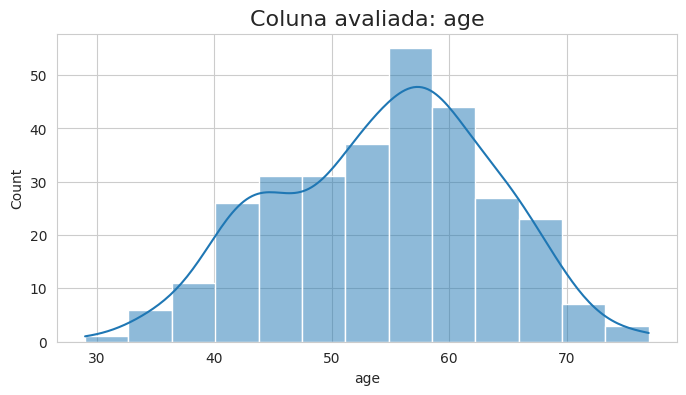

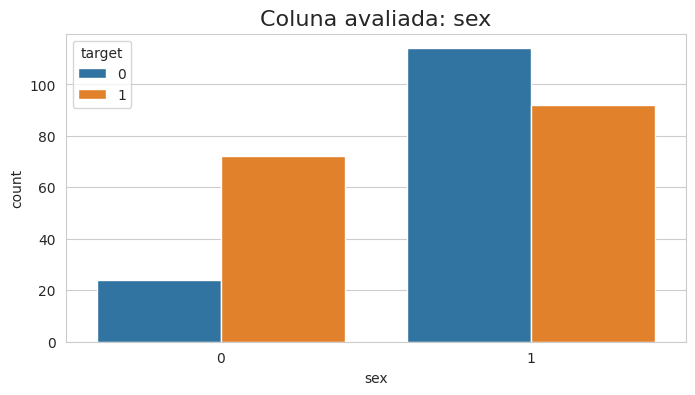

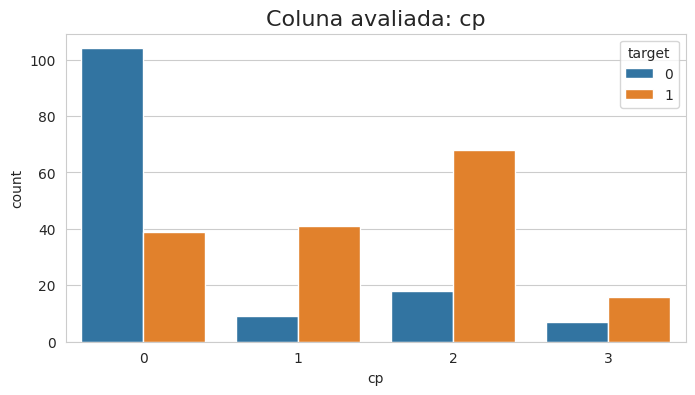

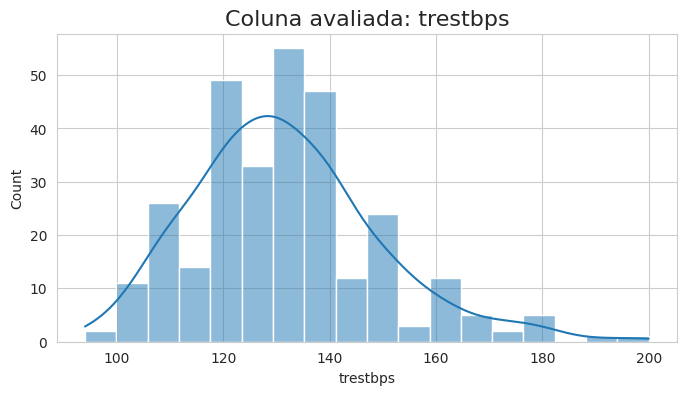

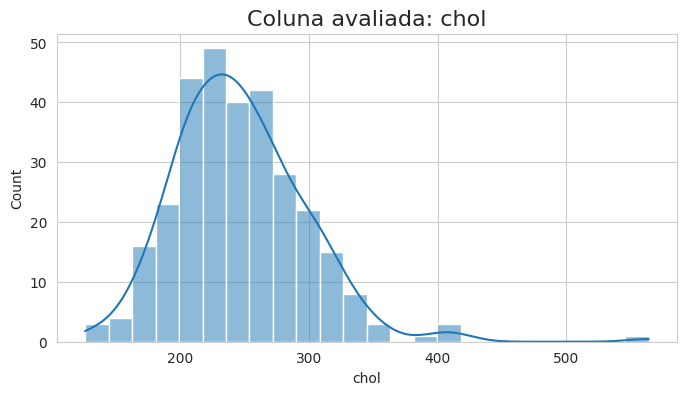

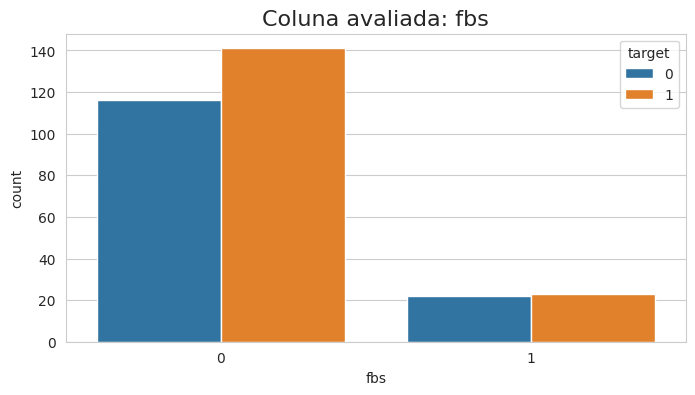

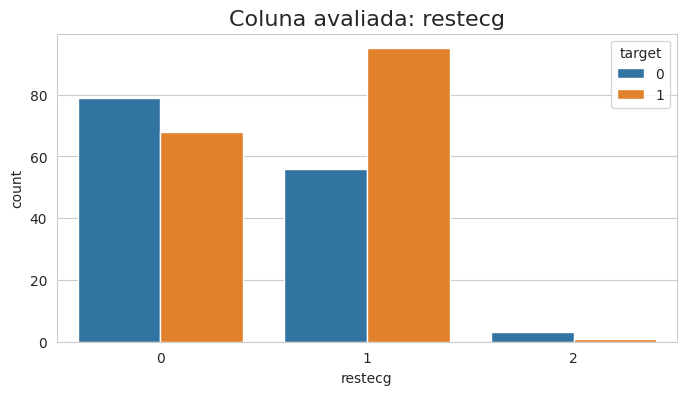

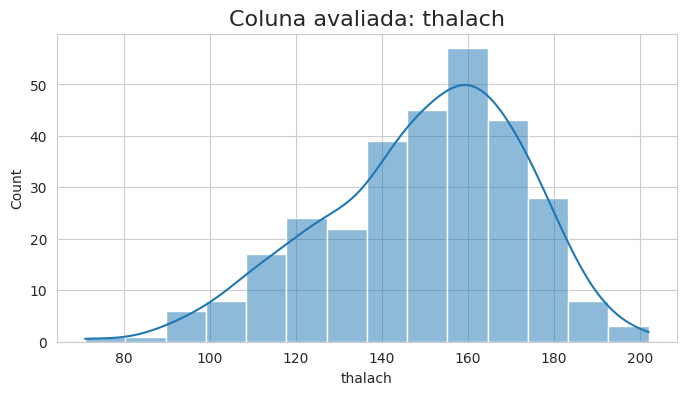

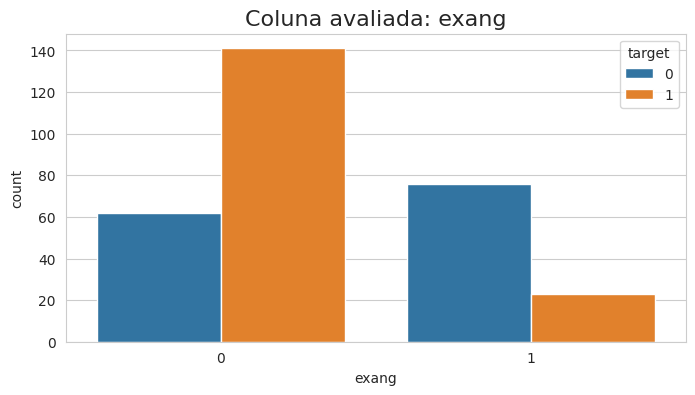

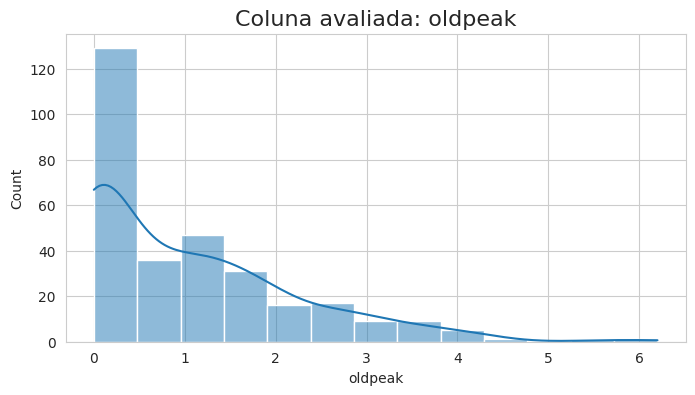

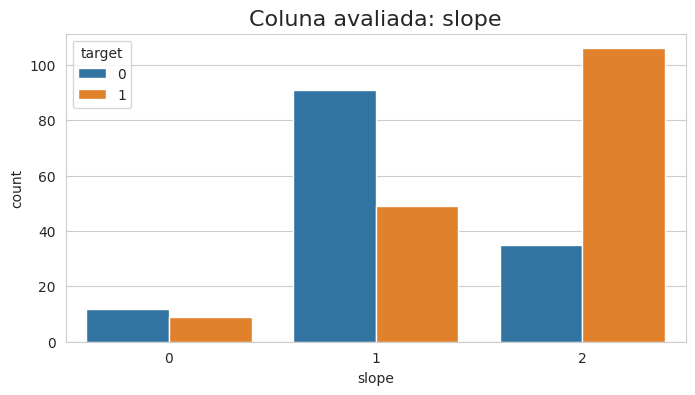

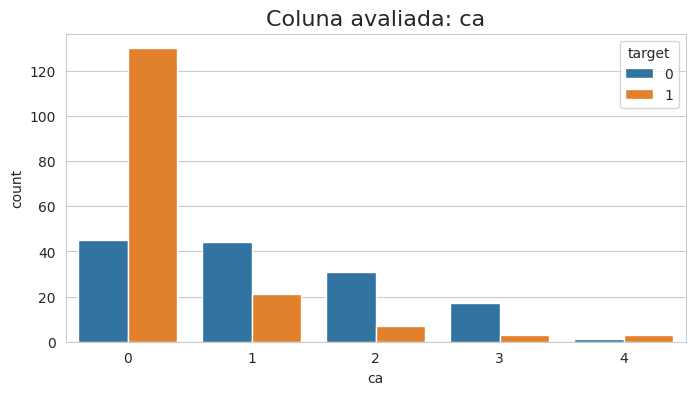

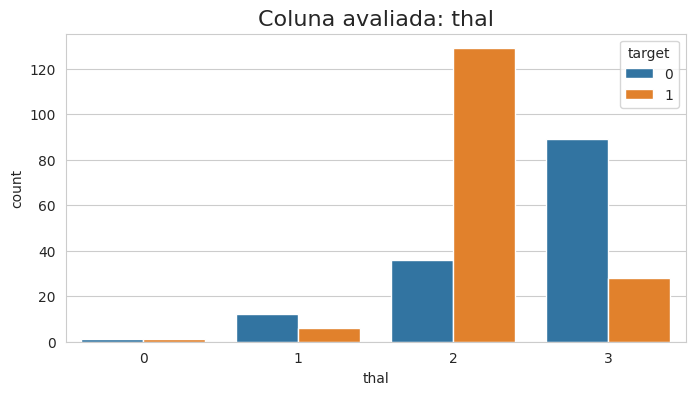

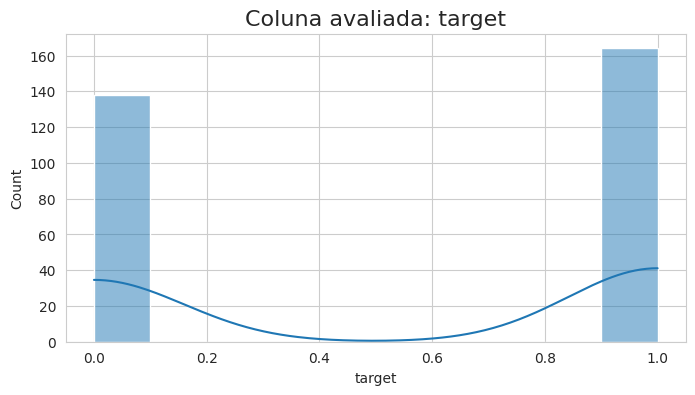

In [272]:
for c in dados.columns:
  plt.figure(figsize=(8,4))
  plt.title(f"Coluna avaliada: {c}", fontsize=16)

  if c in categoricas:
    sns.countplot(x=dados[c], hue=dados['target'])
  else:
    sns.histplot(dados[c], kde=True)

## Removendo Outliers manualmente

<Axes: >

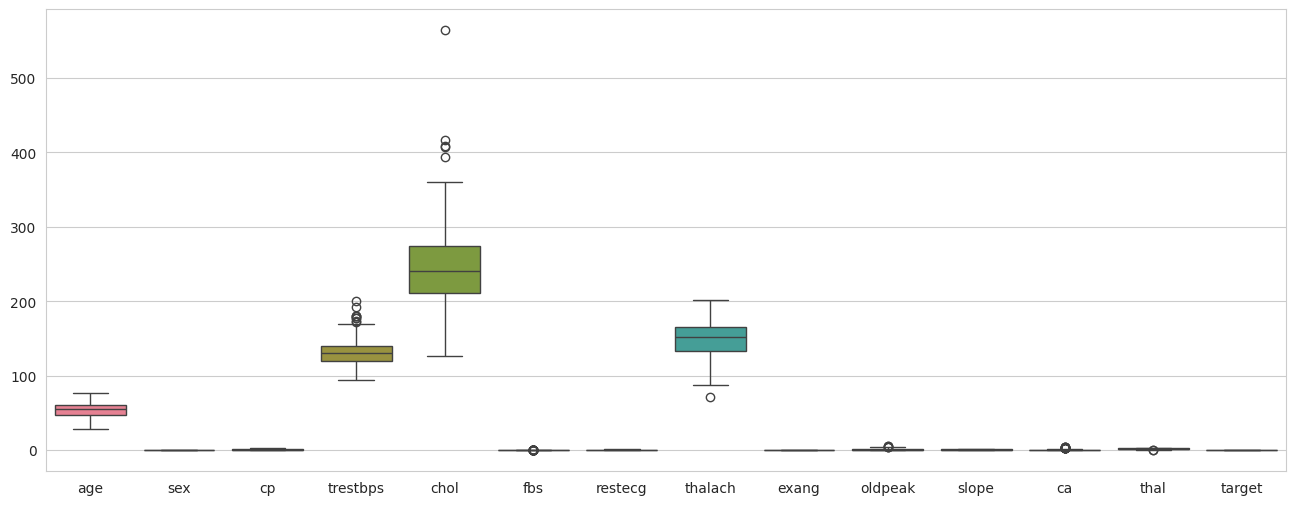

In [273]:
plt.figure(figsize=(16,6))
sns.boxplot(data=dados)

In [274]:
dados.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [275]:
dados['trestbps'].quantile(0.99)

180.0

In [276]:
dados1 = dados[dados['trestbps'] < dados['trestbps'].quantile(0.99)]

<Axes: >

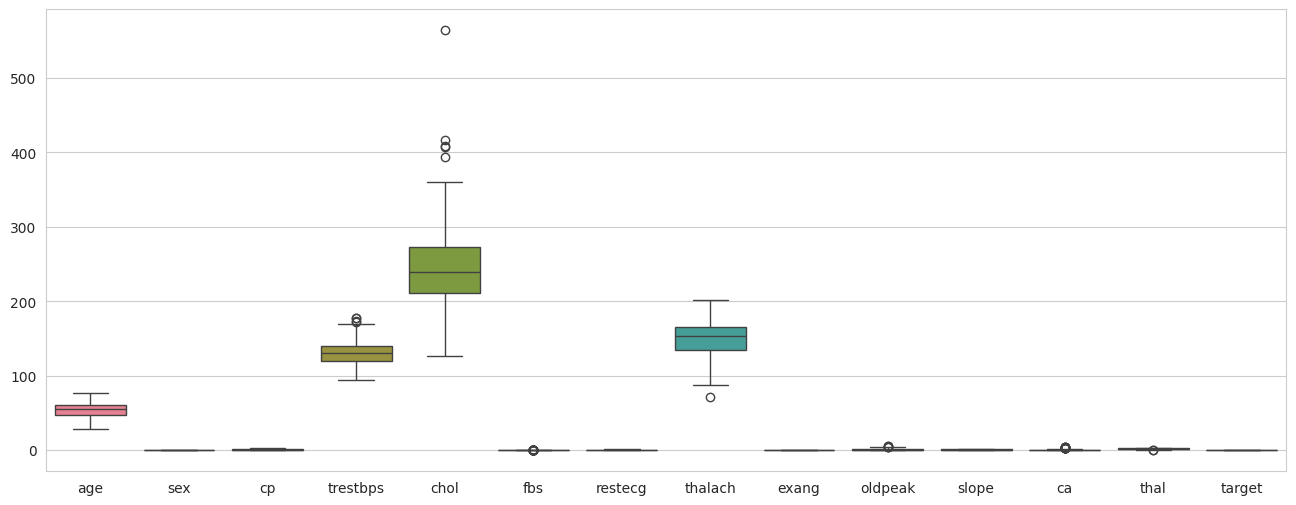

In [277]:
plt.figure(figsize=(16,6))
sns.boxplot(data=dados1)

In [278]:
dados2 = dados1[dados1['chol'] < dados1['chol'].quantile(0.98)]

<Axes: >

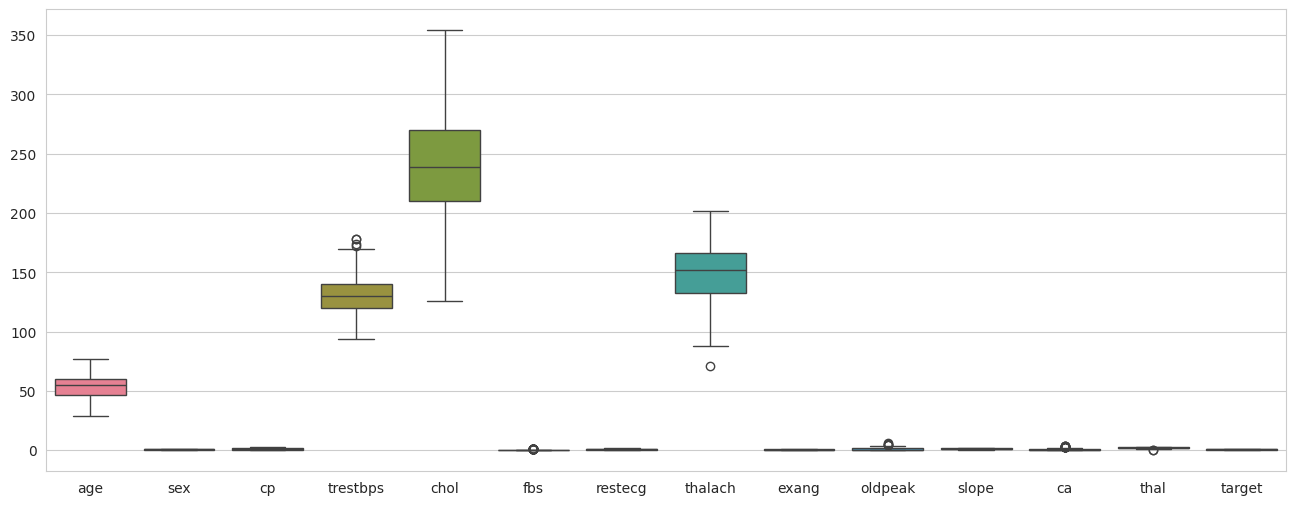

In [279]:
plt.figure(figsize=(16,6))
sns.boxplot(data=dados2)

In [280]:
dados3 = dados2[dados2['chol'] < dados2['chol'].quantile(0.98)]

In [281]:
dados1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

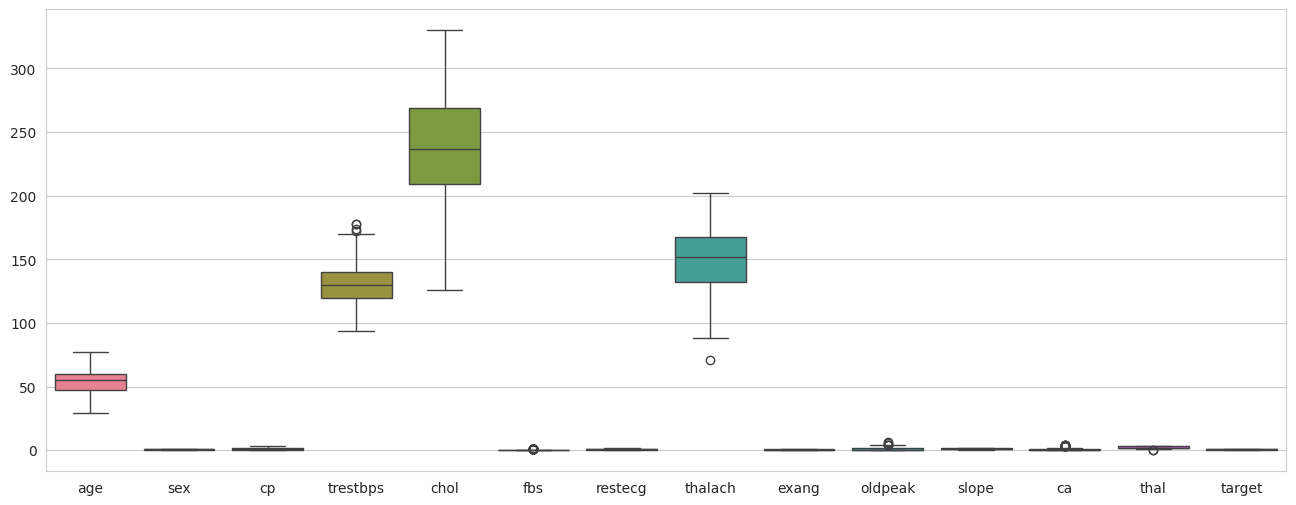

In [282]:
plt.figure(figsize=(16,6))
sns.boxplot(data=dados3)

In [283]:
dados4 = dados3[dados3['thalach'] > dados3['thalach'].quantile(0.005)]

<Axes: >

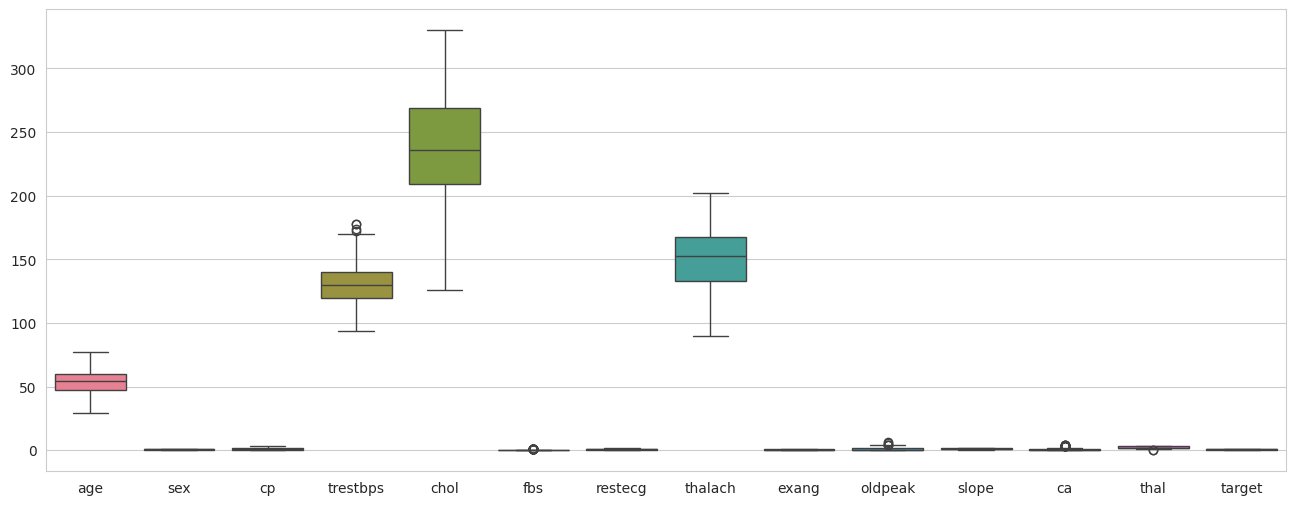

In [284]:
plt.figure(figsize=(16,6))
sns.boxplot(data=dados4)

In [285]:
dados4.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.067376,0.705674,0.982270,130.549645,239.304965,0.14539,0.524823,149.868794,0.315603,1.008865,1.400709,0.726950,2.301418,0.553191
std,9.125015,0.456549,1.038256,16.256376,41.855104,0.35312,0.521175,22.533972,0.465582,1.145761,0.619148,1.015845,0.618169,0.498046
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.00000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.000000,0.00000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.500000,1.000000,1.000000,130.000000,236.000000,0.00000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,268.750000,0.00000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,330.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [286]:
categoricas

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [287]:
dados4 = pd.get_dummies(dados3,
                        columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dados4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
733,44,108,141,175,0.6,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
739,52,128,255,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
843,59,160,273,125,0.0,0,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


In [288]:
X = dados4.drop('target', axis=1)
y = dados4['target']

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
## Iniciando com Logistic Regression
log = LogisticRegression(max_iter=1300)

In [291]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1300)

In [292]:
## Verificando a acurácia do modelo na base de treino
log.score(X_train, y_train)

0.9030837004405287

In [293]:
## Verificando a acurácia do modelo na base de test
log.score(X_test, y_test)

0.7719298245614035

In [294]:
y_predict = log.predict(X_test)

In [295]:
accuracy_score(y_test, y_predict)

0.7719298245614035

In [296]:
y_predict

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [301]:
def relatorio_ml(dados, algoritmo, opt=2):
    X = dados.drop('target', axis=1)
    y = dados['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if opt == 0:
        ml = algoritmo(max_iter=1300)
    elif opt == 1:
        ml = algoritmo(n_estimators=1300)
    elif opt == 2:
        ml = algoritmo()

    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f'Acurácia treino: {score_train * 100:.2f}%')
    score_test = ml.score(X_test, y_test)
    print(f'Acurácia teste: {score_test * 100:.2f}%') # Corrected the print statement

    y_predict = ml.predict(X_test) # Changed log to ml
    print('.....Classification report.....')
    print(classification_report(y_test, y_predict))
    print('.....Confusion matrix.....')
    confusion = confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion, annot=True, cmap='Blues')

    return score_train, score_test # Moved the return statement outside the conditional blocks

Acurácia treino: 90.31%
Acurácia teste: 77.19%
.....Classification report.....
              precision    recall  f1-score   support

           0       0.79      0.62      0.70        24
           1       0.76      0.88      0.82        33

    accuracy                           0.77        57
   macro avg       0.78      0.75      0.76        57
weighted avg       0.77      0.77      0.77        57

.....Confusion matrix.....


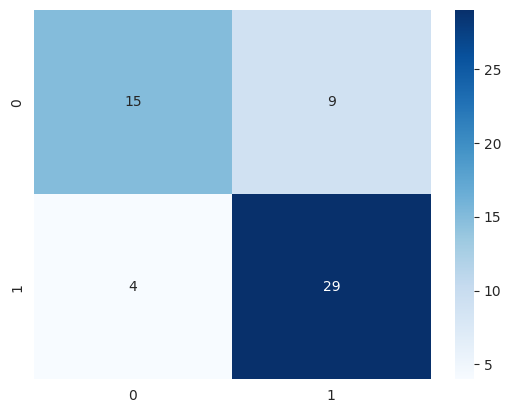

In [302]:
log_train, log_test = relatorio_ml(dados4, LogisticRegression, opt=0)

### Testando o algorítmo para diferentes data frames

Acurácia treino: 100.00%
Acurácia teste: 61.40%
.....Classification report.....
              precision    recall  f1-score   support

           0       0.56      0.38      0.45        24
           1       0.63      0.79      0.70        33

    accuracy                           0.61        57
   macro avg       0.60      0.58      0.58        57
weighted avg       0.60      0.61      0.60        57

.....Confusion matrix.....


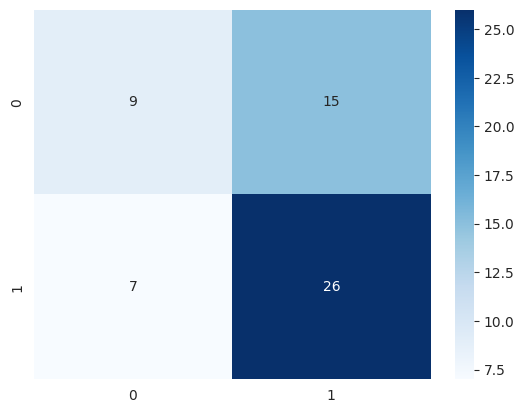

In [303]:
tree_train, tree_test = relatorio_ml(dados4, DecisionTreeClassifier)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acurácia treino: 95.59%
Acurácia teste: 71.93%
.....Classification report.....
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        24
           1       0.73      0.82      0.77        33

    accuracy                           0.72        57
   macro avg       0.71      0.70      0.70        57
weighted avg       0.72      0.72      0.71        57

.....Confusion matrix.....


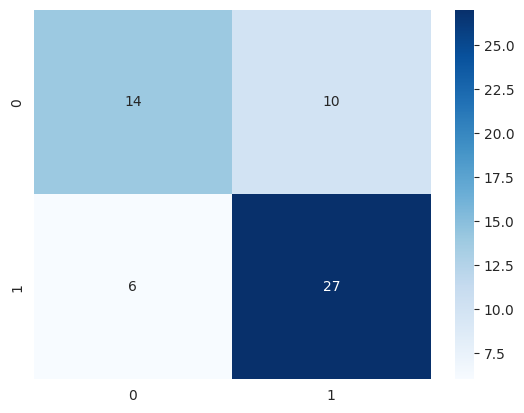

In [300]:
ada_train, ada_test = relatorio_ml(dados4, AdaBoostClassifier)